In [20]:
%matplotlib inline
import Incremental_U as IncU
from matplotlib import pyplot as plt
import numpy as np

In [2]:
covs10 = IncU.coverage_counter("/home/djeffrie/Data/Transposable_elements/RAD_TE_pipeline/Test/M_2/T10.tags.tsv", True)

covs11 = IncU.coverage_counter("/home/djeffrie/Data/Transposable_elements/RAD_TE_pipeline/Test/M_2/T11.tags.tsv.gz", True)


tags10 = IncU.Tag_counter("/home/djeffrie/Data/Transposable_elements/RAD_TE_pipeline/Test/M_2/T10.tags.tsv", "M", 2, True)

tags11 = IncU.Tag_counter("/home/djeffrie/Data/Transposable_elements/RAD_TE_pipeline/Test/M_2/T11.tags.tsv.gz", "M", 2, True)


Mean and SD of coverage for T10, M=2:  11.04 (+/- 10.8)

Mean and SD of coverage for T11, M=2:  11.7 (+/- 11.97)

T10.tags.tsv at M = 2 Total_tags = 90815, Good tags = 89365, N blacklisted = 1450
T11.tags.tsv.gz at M = 2 Total_tags = 90866, Good tags = 89396, N blacklisted = 1470


89396

In [51]:
CDhit_outs = open("/home/djeffrie/Data/Transposable_elements/RAD_TE_pipeline/Test/CDhit/T10_clustered_80.clstr", 'r').readlines()

In [61]:
Cluster_sizes = {}
for line in CDhit_outs:
    if line.startswith(">Cluster"):
        counter = 0
        Cluster_name = line.split()[1]
        Cluster_sizes[Cluster_name] = 0
    else:
        Cluster_sizes[Cluster_name] += 1

In [62]:
singletons = []
for i in  Cluster_sizes:
    if Cluster_sizes[i] == 1:
        singletons.append(i)

for j in singletons:
    del Cluster_sizes[j]

In [63]:
high_clusts = {}
low_clusts = {}

mean = np.mean(Cluster_sizes.values())
std = np.std(Cluster_sizes.values())

for i in Cluster_sizes:
    if Cluster_sizes[i] > mean + 2*std:
        high_clusts[i] = Cluster_sizes[i]
    else:
        low_clusts[i] = Cluster_sizes[i]

In [64]:
np.mean(low_clusts.values())

13.779294527048402

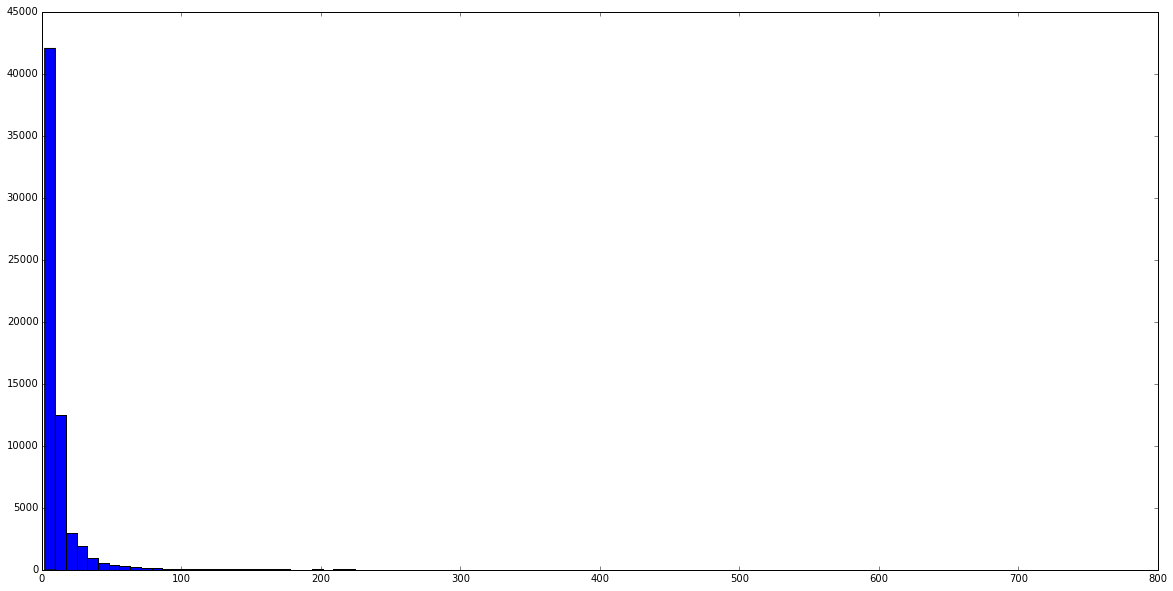

In [44]:
plt.figure(figsize=(20,10))
plt.hist(low_clusts.values(), bins = 100)
plt.show()

800
56225
3527.02272727


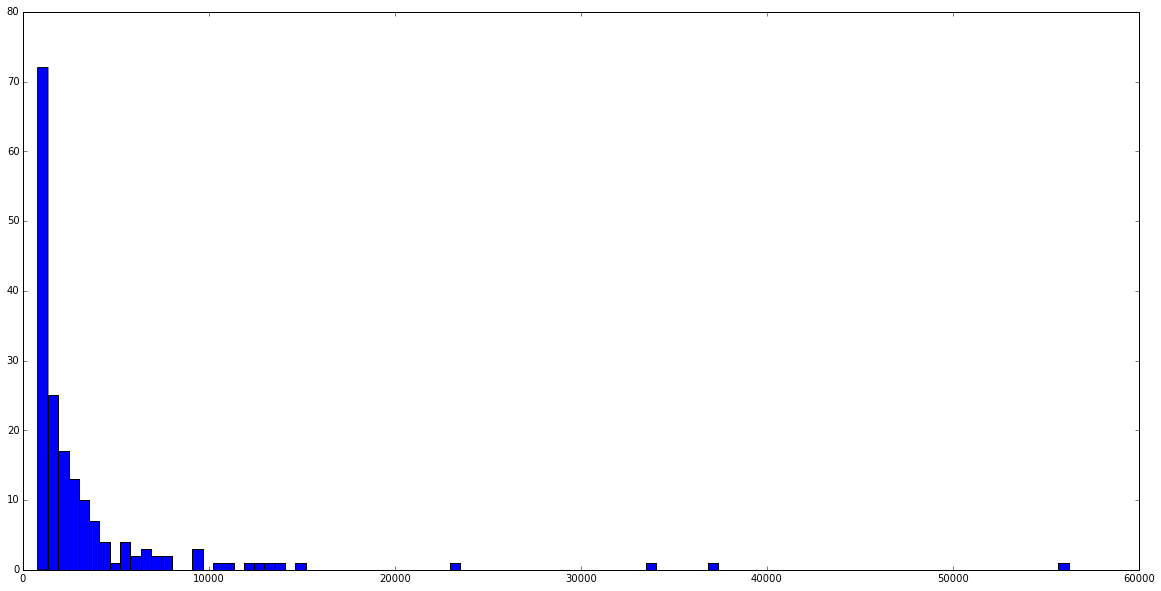

In [40]:


print min(high_clusts.values())
print max(high_clusts.values())
print np.mean(high_clusts.values())

plt.figure(figsize=(20,10))
plt.hist(high_clusts.values(), bins = 100)
plt.show()


In [85]:
CDhit_outs = open("/home/djeffrie/Data/Transposable_elements/RAD_TE_pipeline/Test/CDhit/T12_clustered_80.clstr", 'r').readlines()

In [86]:
Cluster_sizes = {}
for line in CDhit_outs:
    if line.startswith(">Cluster"):
        counter = 0
        Cluster_name = line.split()[1]
        Cluster_sizes[Cluster_name] = 0
    else:
        Cluster_sizes[Cluster_name] += 1

In [87]:
Cluster_sizes = {}
for line in CDhit_outs:
    if line.startswith(">Cluster"):
        counter = 0
        Cluster_name = line.split()[1]
        Cluster_sizes[Cluster_name] = 0
    else:
        Cluster_sizes[Cluster_name] += 1

In [88]:
high_clusts = {}
low_clusts = {}

mean = np.mean(Cluster_sizes.values())
std = np.std(Cluster_sizes.values())

for i in Cluster_sizes:
    if Cluster_sizes[i] > mean + 2*std:
        high_clusts[i] = Cluster_sizes[i]
    else:
        low_clusts[i] = Cluster_sizes[i]

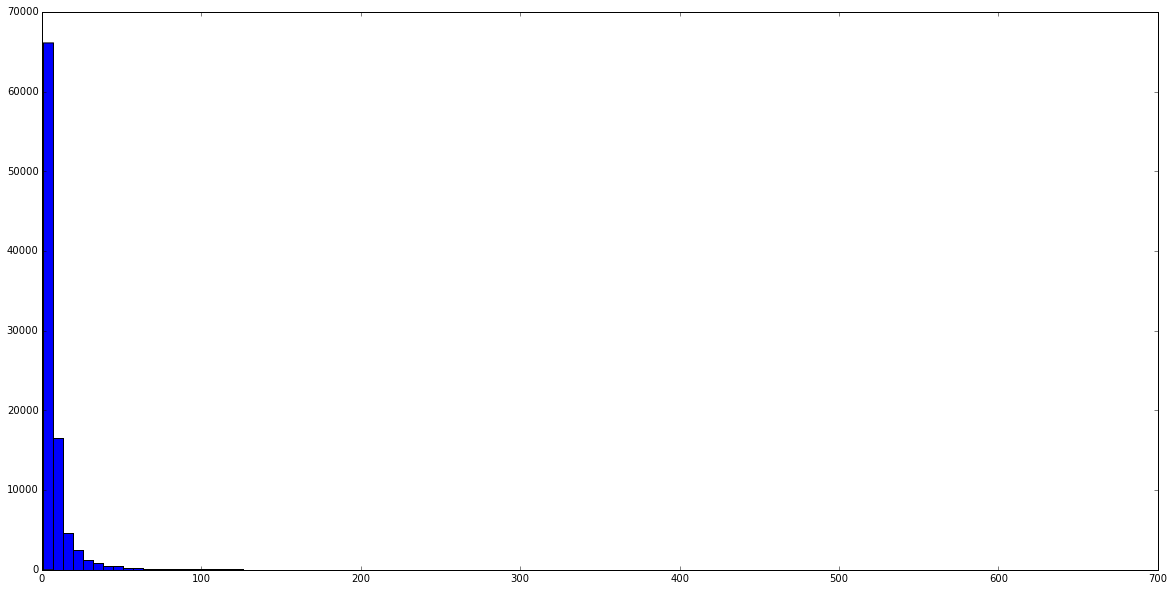

In [89]:
plt.figure(figsize=(20,10))
plt.hist(low_clusts.values(), bins = 100)
plt.show()

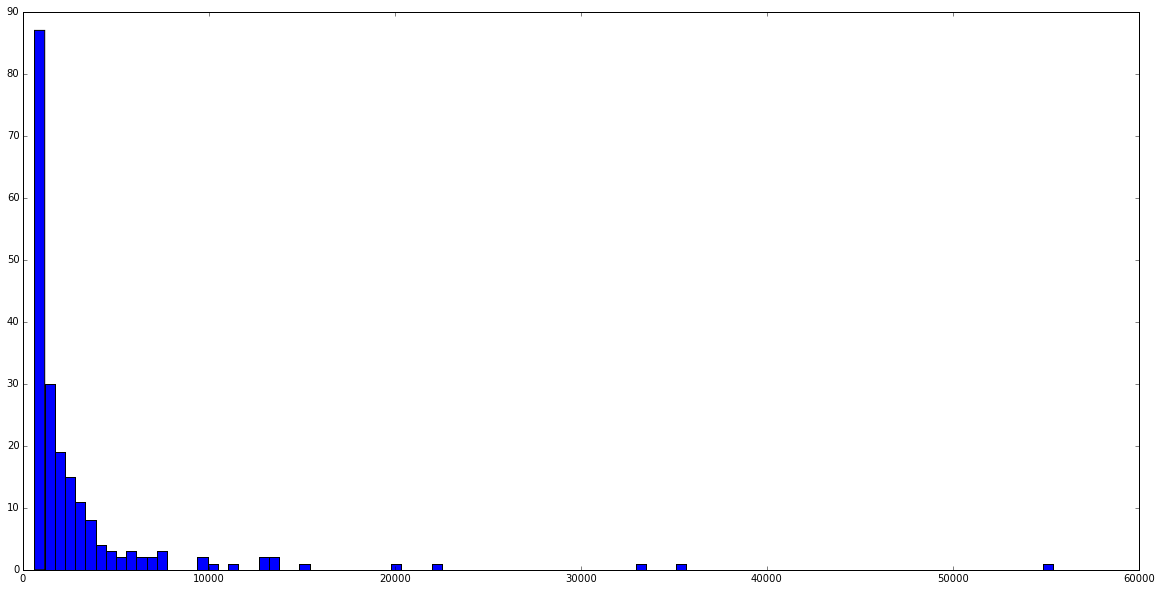

In [90]:
plt.figure(figsize=(20,10))
plt.hist(high_clusts.values(), bins = 100)
plt.show()


In [91]:
high_clust_consensus_seqs = []

for line in CDhit_outs:
    if line.startswith(">Cluster"):
        counter = 0
        Cluster_name = line.split()[1]
    if "*" in line:
        ConsensusID = line.split()[2].split(".")[0]
        
        if Cluster_name in high_clusts:
            high_clust_consensus_seqs.append(ConsensusID)
        

In [92]:
high_clust_cons_outs = open("/home/djeffrie/Data/Transposable_elements/RAD_TE_pipeline/Test/CDhit/High_cluster_consesnsus_seqIDs_T12.txt", 'w')

for i in high_clust_consensus_seqs:
    high_clust_cons_outs.write("%s\n" % i)
    
high_clust_cons_outs.close()